# Function idct

## Synopse

Inverse Discrete Cossine Transform.

- **g = idct(F)**

  - **g**:output: image after inverse dct transform (spatial domain). 
  - **F**:input: input dct image (frequency domain).

In [1]:
import numpy as np

def idct(F):
    import ia898.src as ia
    F = F.astype(np.float64)
    if len(F.shape) == 1: F = F[:,newaxis]
    (m, n) = F.shape
    if (n == 1):
        A = ia.dctmatrix(m)
        g = np.dot(np.transpose(A), F)
    else:
        A=ia.dctmatrix(m)
        B=ia.dctmatrix(n)
        g = np.dot(np.dot(np.transpose(A), F), B)
    return g

## Examples

In [2]:
testing = (__name__ == "__main__")

if testing:
    ! jupyter nbconvert --to python idct.ipynb
    import numpy as np
    import sys,os
    %matplotlib inline
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook idct.ipynb to python
[NbConvertApp] Writing 3252 bytes to idct.py


### Example 1

In [3]:
if testing:
    np.set_printoptions(suppress=True, precision=2)
    f = np.array([[4,3,2,1],[3,3,2,1],[2,2,2,1],[1,1,1,1]])
    print('Matriz original:\n',f)
    F = ia.dct(f)
    print('\nDCT:\n',F)
    g = ia.idct(F)
    print('\nMatriz restaurada:\n',g)    

Matriz original:
 [[4 3 2 1]
 [3 3 2 1]
 [2 2 2 1]
 [1 1 1 1]]

DCT:
 [[ 7.5   2.23 -0.5   0.16]
 [ 2.23  1.71  0.    0.  ]
 [-0.5   0.    0.5  -0.  ]
 [ 0.16 -0.   -0.    0.29]]

Matriz restaurada:
 [[ 4.  3.  2.  1.]
 [ 3.  3.  2.  1.]
 [ 2.  2.  2.  1.]
 [ 1.  1.  1.  1.]]


### Example 2

""
Imagem original (f)

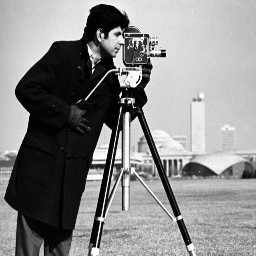

""
Imagem dct/idct (g)

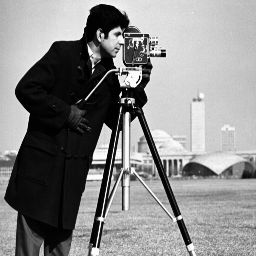

Diferença entre imagem original f e imagem após dct e idct (g): 1.40440788523e-07


In [4]:
if testing:
    f = mpimg.imread('../data/cameraman.tif')
    ia.adshow(f,'Imagem original (f)')
    F = ia.dct(f)
    g = ia.idct(F)
    ia.adshow(g.astype(np.uint8),'Imagem dct/idct (g)')
    
    print('Diferença entre imagem original f e imagem após dct e idct (g):', np.sum(np.sum(abs(f-g))))
    
    

### Example 3
Image compression using dct

""
Imagem original (f)
""
Visualização da DCT de f
""
Selecionando apenas 1 quarto da imagem
""
Visualização da DCT da imagem comprimida
""
Imagem restaurada após compressão
""

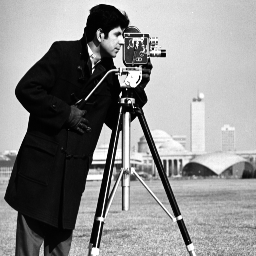
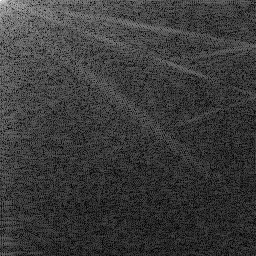
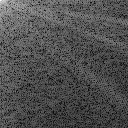
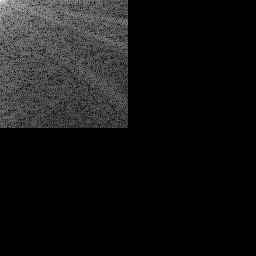
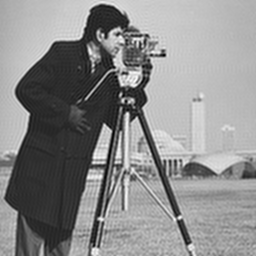
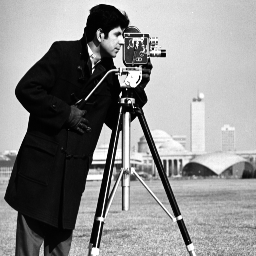

In [5]:
if testing:
    f = mpimg.imread('../data/cameraman.tif')
    nb = ia.nbshow(2)
    nb.nbshow(ia.normalize(f),'Imagem original (f)')
    F = ia.dct(f)
    nb.nbshow( ia.normalize(np.log(abs(F)+1)),'Visualização da DCT de f')
    F1 = F[:256//2,:256//2]
    nb.nbshow( ia.normalize(np.log(abs(F1)+1)),'Selecionando apenas 1 quarto da imagem')

    F2 = np.zeros(F.shape)
    F2[:256//2,:256//2] = F1
    nb.nbshow( ia.normalize(np.log(abs(F2)+1)),'Visualização da DCT da imagem comprimida')
    g = ia.idct(F2)
    nb.nbshow(ia.normalize(g),'Imagem restaurada após compressão')
    nb.nbshow(ia.normalize(f),'Imagem original (f)')
    
    nb.nbshow()
    

### Example 4
compare with scipy function

""
Imagem original
""
Imagem restaurada - scipy
""
Imagem restaurada - toolbox

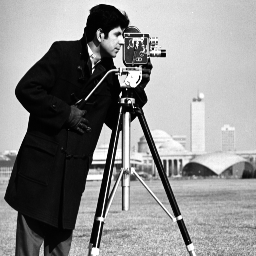
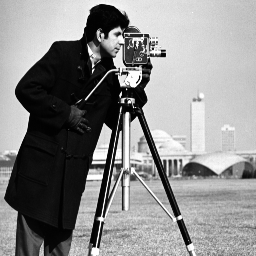
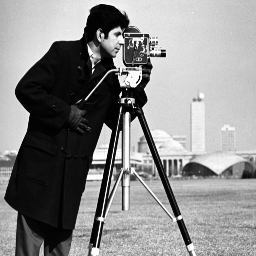

Diferença entre as duas funções (scipy e implementada): 2.01434659754e-08

Tempo de execução função implementada:
100 loops, best of 3: 5.49 ms per loop
Tempo de execução scipy:
1000 loops, best of 3: 1.22 ms per loop


In [6]:
if testing:
    from scipy.fftpack import idct as spidct
    f = mpimg.imread('../data/cameraman.tif')
    F = ia.dct(f)
    g = ia.idct(F)
    gscipy = spidct(spidct(F,norm='ortho',axis=0),norm='ortho',axis=1)
    
    nb = ia.nbshow(3)
    nb.nbshow( ia.normalize(f),'Imagem original')
    nb.nbshow( ia.normalize(g),'Imagem restaurada - scipy')
    nb.nbshow( ia.normalize(gscipy),'Imagem restaurada - toolbox')
    nb.nbshow()
    
    print('Diferença entre as duas funções (scipy e implementada):',np.sum(np.abs(gscipy-g)))

    print('\nTempo de execução função implementada:')
    %%timeit g = ia.idct(f)
    print('Tempo de execução scipy:')
    %%timeit gscipy = spidct(spidct(F,norm='ortho',axis=0),norm='ortho',axis=1)